# Análisis departamento de Experiencia del Cliente

## Cargar dataset df_tourist_python_sprint3.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tourist = pd.read_csv("df_tourist_python.csv", sep= ';')

df_tourist

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina d'Aro,NaN,Entire home/apt,8,2.0,4.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9646,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2.0,3.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,25.0,spain,girona,2021-02-27
9647,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palam�s,NaN,Entire home/apt,6,1.0,3.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9648,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamber�,Entire home/apt,4,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,105.0,spain,madrid,2021-02-09


## KPI´s

 ### tasa_ocupacion mensual

In [2]:

#tasa_ocupacion mensual
df_tourist['dias_ocupados_30'] = 30 - df_tourist['availability_30']
df_tourist['tasa_ocupacion_30'] = (df_tourist['dias_ocupados_30'] / 30) * 100

#la tasa media de ocupación de todos los alojamientos
tasa_ocupacion_promedio = df_tourist['tasa_ocupacion_30'].mean()

print(f"Tasa de ocupación promedio mensual: {tasa_ocupacion_promedio:.2f}%")


Tasa de ocupación promedio mensual: 56.50%


### Ciudad con mayor ocupación

In [3]:
df_tourist['dias_ocupados'] = 365 - df_tourist['availability_365']
city_occupancy = df_tourist.groupby('city').agg({
    'dias_ocupados': 'sum',
    'availability_365': 'sum'
})
city_occupancy['tasa_ocupacion'] = (city_occupancy['dias_ocupados'] / (city_occupancy['dias_ocupados'] + city_occupancy['availability_365'])) * 100

# Ciudad con mayor ocupación
max_city = city_occupancy['tasa_ocupacion'].idxmax()
max_rate = city_occupancy['tasa_ocupacion'].max()
print(f"Ciudad con mayor ocupación: {max_city} ({max_rate:.2f}%)")


Ciudad con mayor ocupación: madrid (54.65%)


### Índice de satisfacción general

In [4]:
valid_reviews = df_tourist[df_tourist['review_scores_rating'].notna()]
indice_satisfaccion = valid_reviews['review_scores_rating'].sum() / len(valid_reviews)
print(f"Índice de satisfacción general: {indice_satisfaccion:.2f}")

Índice de satisfacción general: 92.51


### Ítem con mayor satisfacción promedio

In [5]:
satisfaction_items = {
    'Accuracy': df_tourist['review_scores_accuracy'].mean(),
    'Cleanliness': df_tourist['review_scores_cleanliness'].mean(),
    'Check-in': df_tourist['review_scores_checkin'].mean(),
    'Communication': df_tourist['review_scores_communication'].mean(),
    'Location': df_tourist['review_scores_location'].mean()
}

# Encontrar el máximo
item_max = max(satisfaction_items, key=satisfaction_items.get)
print(f"Ítem con mayor satisfacción promedio: {item_max} ({satisfaction_items[item_max]:.2f})")


Ítem con mayor satisfacción promedio: Check-in (97.25)


### visualizacion KPI´s

In [15]:
import pandas as pd
import plotly.express as px

# Datos iniciales
data = {
    'Semana': ['Semana 1', 'Semana 2', 'Semana 3'],
    'tasa_ocupacion_mensual': [59.03, 58.65, 56.50],
    'indice_satisfaccion_general': [92.39, 92.42, 92.51],
    'ciudad_mayor_ocupacion': ['madrid (65.3%)', 'madrid (54.57%)', 'madrid (54.65%)'],
    'item_mayor_satisfaccion': ['Communication (97.11)', 'Communication (97.11)', 'Check-in (97.25)']
}
df = pd.DataFrame(data)

# Extract percentages
df['ocupacion_pct'] = df['ciudad_mayor_ocupacion'].str.extract(r'(\d+\.?\d*)').astype(float)
df['item_pct'] = df['item_mayor_satisfaccion'].str.extract(r'(\d+\.?\d*)').astype(float)

# Extract only the name part (before the parenthesis)
df['ciudad'] = df['ciudad_mayor_ocupacion'].str.extract(r'(^[^\(]+)').iloc[:,0].str.strip()
df['item'] = df['item_mayor_satisfaccion'].str.extract(r'(^[^\(]+)').iloc[:,0].str.strip()

# Create label texts for bars (city + %)
df['ocupacion_label'] = df['ciudad'] + " (" + df['ocupacion_pct'].round(2).astype(str) + "%)"

# Create label texts for satisfaction item + %
df['item_label'] = df['item'] + " (" + df['item_pct'].round(2).astype(str) + ")"

# 1) Line plot tasa de ocupacion mensual
fig1 = px.line(
    df,
    x='Semana',
    y='tasa_ocupacion_mensual',
    title='Tasa de ocupación mensual',
    markers=True
)
fig1.update_layout(yaxis_title='Porcentaje (%)', paper_bgcolor="#D8F3DC", plot_bgcolor="#D8F3DC")
fig1.show()

# 2) Line plot indice de satisfaccion general
fig2 = px.line(
    df,
    x='Semana',
    y='indice_satisfaccion_general',
    title='Índice de satisfacción general',
    markers=True
)
fig2.update_layout(yaxis_title='Porcentaje (%)', paper_bgcolor="#D8F3DC", plot_bgcolor="#D8F3DC")
fig2.show()

# 3) Bar chart ciudad mayor ocupacion, texto ترکیبی اسم شهر و درصد
fig3 = px.bar(
    df,
    x='Semana',
    y='ocupacion_pct',
    title='Ciudad con mayor ocupación (%)',
    text='ocupacion_label',
    color_discrete_sequence=['#2D6A4F']
)
fig3.update_layout(yaxis_title='Porcentaje (%)', paper_bgcolor="#D8F3DC", plot_bgcolor="#D8F3DC")
fig3.show()

# 4) Bar chart item mayor satisfaccion, متن ترکیبی اسم آیتم و درصد
fig4 = px.bar(
    df,
    x='Semana',
    y='item_pct',
    title='Ítem con mayor satisfacción (%)',
    text='item_label',
    color_discrete_sequence=['#2D6A4F']
)
fig4.update_layout(yaxis_title='Porcentaje (%)', paper_bgcolor="#D8F3DC", plot_bgcolor="#D8F3DC")
fig4.show()


## Análisis departamento Cliente:

In [7]:
#Creación dataset para analisis cliente:
df_cl = df_tourist[['room_type','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value','city']]

### Analasis de la Experiencia del Cliente

Analista d'experiència del client: Hi ha una relació entre el preu de l'allotjament i la satisfacció general dels clients? Com varia aquesta relació en funció de les diferents ciutats on s'ubiquen els allotjaments

In [8]:
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd 

# Asumiendo que 'df_tourist' es tu DataFrame y 'price' es la columna que quieres evaluar
data = df_cl['price'].dropna() # Elimina los valores NaN para el test

stat, p = lilliefors(data)
print("Prueba de Lilliefors (Kolmogorov-Smirnov con corrección): p =", p)
if p > 0.05:
    print("Ho: La distribución parece ser normal.")
else:
    print("H1: la distribución no parece ser normal.")

Prueba de Lilliefors (Kolmogorov-Smirnov con corrección): p = 0.0009999999999998899
H1: la distribución no parece ser normal.


<Figure size 800x600 with 0 Axes>

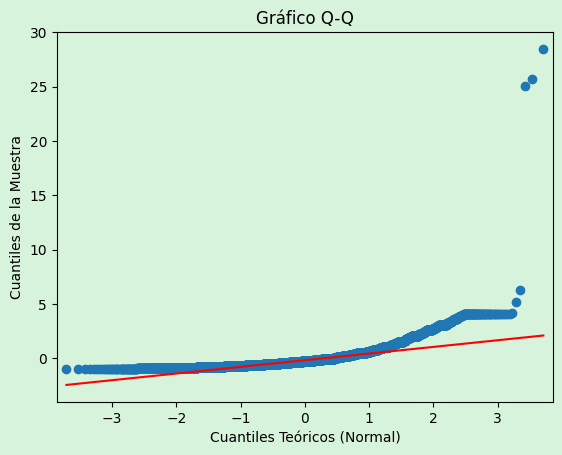

In [9]:
import plotly.express as px
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Asumiendo que 'df_tourist' es tu DataFrame y 'price' es la columna que quieres evaluar
data = df_cl['price'].dropna()

# Histograma
fig_hist = px.histogram(df_cl, x='price', title='Histograma de Precios')
fig_hist.update_layout(paper_bgcolor="#D8F3DC", plot_bgcolor="#D8F3DC")
fig_hist.show()

# Gráfico Q-Q usando statsmodels
plt.figure(figsize=(8, 6))

qqplot(data, stats.norm, fit=True, line='q')

plt.title('Gráfico Q-Q')

plt.xlabel('Cuantiles Teóricos (Normal)')
plt.ylabel('Cuantiles de la Muestra')

plt.gca().set_facecolor('#D8F3DC')
plt.gcf().set_facecolor('#D8F3DC')

plt.show()

### Valor de correlación 


In [10]:
from scipy.stats import spearmanr
import pandas as pd

# Elimina las filas donde alguna de las dos columnas tiene NaN
df_cleaned = df_cl[['price', 'review_scores_rating']].dropna()

if not df_cleaned.empty:
    price_data = df_cleaned['price']
    rating_data = df_cleaned['review_scores_rating']

    correlation_spearman, p_value_spearman = spearmanr(price_data, rating_data)
    print(f"Correlación de Spearman entre precio y review_scores_rating: {correlation_spearman:.3f}")
    print(f"Valor p (Spearman): {p_value_spearman:.4f}")
else:
    print("No hay suficientes datos coincidentes para calcular la correlación de Spearman.")

Correlación de Spearman entre precio y review_scores_rating: 0.115
Valor p (Spearman): 0.0000


> Valor de correlación (Spearman ρ = 0.115)
Este valor indica una relación positiva muy débil entre el precio y la puntuación de las valoraciones de los clientes. Es decir, en promedio, cuando el precio aumenta, la puntuación de las valoraciones tiende a subir ligeramente, pero la fuerza de esta relación es casi insignificante.

> Valor p (p-value) = 0.0000
Dado que p < 0.05, esta relación es estadísticamente significativa. Esto implica que la probabilidad de observar una correlación de esta magnitud (o mayor) por azar es prácticamente nula.

- Análisis profesional:
Aunque existe una correlación positiva estadísticamente significativa entre el precio y la puntuación de las valoraciones de los clientes, su magnitud es muy baja. Esto sugiere que el precio, por sí solo, no es un buen predictor de las valoraciones de los clientes. Otros factores deben tener una influencia mucho mayor en cómo los clientes valoran su experiencia.

- Resumen de resultados:
La prueba de correlación de Spearman entre el precio y la puntuación de las valoraciones reveló una relación positiva débil pero estadísticamente significativa (ρ = 0.115, p < 0.001). Si bien esta relación es detectable, su baja intensidad confirma que el precio no es el factor determinante principal de las valoraciones de los clientes. Para entender mejor qué impulsa las valoraciones, sería importante analizar otros factores relevantes.

### Análisis a nivel de ciudades

Para garantizar la fiabilidad de los resultados, solo se incluyeron en el análisis aquellas ciudades que contaban con al menos 30 alojamientos registrados. Este umbral de 30 se elige porque, en estadística, disponer de un mínimo de 30 muestras suele considerarse necesario para realizar análisis fiables. De esta forma, los resultados de correlación son más estables, precisos y menos sensibles a valores atípicos o dispersos. Las ciudades con menos de 30 datos fueron excluidas para evitar interpretaciones erróneas.

In [11]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import pandas as pd

# Asegúrate de que 'df_cl' contenga las columnas 'price' y 'city'

# Realiza el ANOVA
model = smf.ols('price ~ C(city)', data=df_cl).fit()
anova_table = anova_lm(model)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(city),7.0,1.062294e+09,1.517563e+08,183.682562,1.873066e-256
Residual,9642.0,7.966105e+09,8.261880e+05,NaN,NaN



df (degrees of freedom):

C(city) tiene 7 grados de libertad. Esto se debe a que hay 8 categorías de ciudades y los grados de libertad para un factor categórico son el número de categorías menos uno (8 - 1 = 7).
Residual tiene 9642 grados de libertad. Este es el número total de observaciones menos el número de grupos (aproximadamente el tamaño total de tu muestra menos 8).
sum_sq (sum of squares):

Para C(city) es de ∼1.06×10 
9
 . Esta es la variabilidad total entre las medias de los precios de las diferentes ciudades.
Para Residual es de ∼7.97×10 
9
 . Esta es la variabilidad dentro de cada grupo de ciudades (la variabilidad de los precios dentro de la misma ciudad).
mean_sq (mean square):

Para C(city) es ∼1.52×10 
8
 . Se calcula dividiendo sum_sq por sus grados de libertad (1.06×10 
9
 /7). Representa la varianza promedio entre las medias de los grupos.
Para Residual es ∼8.26×10 
5
 . Se calcula dividiendo sum_sq por sus grados de libertad (7.97×10 
9
 /9642). Representa la varianza promedio dentro de los grupos.
F:

El valor F es 183.68. Se calcula dividiendo el mean_sq de C(city) por el mean_sq del Residual (1.52×10 
8
 /8.26×10 
5
 ). Este estadístico de prueba nos indica si la varianza entre las medias de los grupos es significativamente mayor que la varianza dentro de los grupos. Un valor F alto sugiere que las medias de los grupos son diferentes.
PR(>F) (p-value):

El valor p es ∼1.87×10 
−256
 , que es un número extremadamente pequeño (prácticamente cero). Este valor p se compara con un nivel de significancia (comúnmente 0.05).
Interpretación:

Dado que el valor p (1.87×10 
−256
 ) es mucho menor que 0.05, rechazamos la hipótesis nula. La hipótesis nula en ANOVA es que no hay diferencias significativas entre las medias de los precios de las diferentes ciudades.

Por lo tanto, la conclusión es que existe una diferencia estadísticamente significativa en el precio promedio entre al menos dos de las ciudades en tu conjunto de datos.

El valor F alto también apoya esta conclusión, indicando que la variabilidad entre las medias de los precios de las ciudades es mucho mayor que la variabilidad de los precios dentro de cada ciudad.

In [12]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Asumiendo que 'df_cl' ya está cargado

# Realizamos la prueba de Tukey
m_comp = pairwise_tukeyhsd(endog=df_cl['price'], groups=df_cl['city'], alpha=0.05)

# Convertimos el resultado a un DataFrame de pandas para facilitar el filtrado
df_tukey = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])

# Tabla de diferencias significativas
df_significativas = df_tukey[df_tukey['reject'] == True]
print("\n--- Diferencias Significativas ---")
print(df_significativas)


--- Diferencias Significativas ---
       group1    group2  meandiff   p-adj      lower      upper  reject
0   barcelona    girona  364.8426  0.0000   275.9292   453.7561    True
3   barcelona  mallorca  810.4478  0.0000   723.3326   897.5630    True
4   barcelona   menorca  808.2867  0.0000   614.3219  1002.2515    True
6   barcelona  valencia -173.1364  0.0020  -305.7770   -40.4959    True
7      girona    madrid -408.9633  0.0000  -502.0822  -315.8445    True
8      girona    malaga -450.0370  0.0000  -592.0875  -307.9865    True
9      girona  mallorca  445.6052  0.0000   346.0582   545.1521    True
10     girona   menorca  443.4441  0.0000   243.5869   643.3012    True
11     girona   sevilla -255.7774  0.0000  -398.8973  -112.6575    True
12     girona  valencia -537.9791  0.0000  -679.0962  -396.8620    True
14     madrid  mallorca  854.5685  0.0000   763.1651   945.9719    True
15     madrid   menorca  852.4074  0.0000   656.4792  1048.3357    True
16     madrid   sevilla  153

In [13]:
# Tabla de diferencias no significativas
df_no_significativas = df_tukey[df_tukey['reject'] == False]
print("\n--- Diferencias No Significativas ---")
print(df_no_significativas)


--- Diferencias No Significativas ---
       group1    group2  meandiff   p-adj     lower     upper  reject
1   barcelona    madrid  -44.1207  0.7014 -123.8113   35.5699   False
2   barcelona    malaga  -85.1943  0.5282 -218.8275   48.4388   False
5   barcelona   sevilla  109.0652  0.2160  -25.7041  243.8346   False
13     madrid    malaga  -41.0736  0.9850 -177.5410   95.3937   False
17     madrid  valencia -129.0157  0.0754 -264.5113    6.4798   False
21     malaga  valencia  -87.9421  0.7842 -260.7607   84.8764   False
22   mallorca   menorca   -2.1611  1.0000 -201.2247  196.9026   False


In [14]:
import plotly.express as px

# Ordenar los datos por la correlación de Spearman
city_corrs_sorted = city_corrs.sort_values('spearman_corr', ascending=False)

# Crear gráfico de barras horizontal con un color fijo
fig = px.bar(
    city_corrs_sorted,
    x='spearman_corr',
    y='city',
    orientation='h',
    text='spearman_corr',
    color_discrete_sequence=['#2D6A4F'],  # todas las barras en verde oscuro
    title='Comparación de la correlación entre precio y satisfacción del cliente entre ciudades'
)

# Personalizar apariencia
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1,
    texttemplate='%{text:.2f}'
)
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    xaxis_title='Coeficiente de correlación de Spearman entre precio y satisfacción',
    yaxis_title='Ciudad',
    title_font_size=20,
    font=dict(color='black', size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=False)
)

# Línea vertical en x=0
fig.add_vline(x=0, line_dash="dash", line_color="gray")

fig.show()


NameError: name 'city_corrs' is not defined

In [ ]:
## Visualización del índice "valor por dinero" promedio por ciudad (satisfacción relativa al precio)

import pandas as pd
import plotly.express as px

# Filtrar solo filas con puntuación y precio no nulos
df_filtrado = df_tourist[
    df_tourist['review_scores_rating'].notna() &
    df_tourist['price'].notna()
].copy()

# Definir el índice valor por dinero
df_filtrado['valor_por_dinero'] = (
    df_filtrado['review_scores_rating'] / df_filtrado['price']
)

# Calcular el promedio del índice por ciudad
valor_por_ciudad = (
    df_filtrado
    .groupby('city')['valor_por_dinero']
    .mean()
    .reset_index()
    .sort_values(by='valor_por_dinero', ascending=False)
)

# Crear gráfico de barras con Plotly y colores personalizados
fig = px.bar(
    valor_por_ciudad,
    x='valor_por_dinero',
    y='city',
    orientation='h',
    text='valor_por_dinero',
    color='valor_por_dinero',
    color_continuous_scale=[
        [0,'#D8F3DC'],
        [0.5, '#8BAE3F'],
        [1, '#2D6A4F' ]
    ],
    title='Comparación del índice valor por dinero en diferentes ciudades'
)

# Ajustes estéticos
fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    xaxis_title='Índice valor por dinero (satisfacción / precio)',
    yaxis_title='Ciudad',
    font=dict(size=14),
    coloraxis_showscale=False  # Oculta la barra de escala de color
)

fig.show()

In [ ]:
# Visualización comparativa del índice "valor por dinero" (satisfacción/precio) entre ciudades, desglosado por tipo de habitación

import pandas as pd
import plotly.express as px

# Preparar datos en formato long
df_melt = (
    df_filtrado
    .pivot_table(
        index='city',
        columns='room_type',
        values='valor_por_dinero',
        aggfunc='mean'
    )
    .fillna(0)
    .reset_index()
    .melt(id_vars='city', var_name='room_type', value_name='valor_por_dinero')
)

# Definir paleta de verdes (sin incluir el fondo)
verde_pal = ['#1B4332', '#2D6A4F', '#52B788', '#8BAE3F']  
room_types = df_melt['room_type'].unique()

# Asignar cíclicamente cada room_type a un verde distinto
color_map = { rt: verde_pal[i % len(verde_pal)] 
              for i, rt in enumerate(room_types) }

# Gráfico apilado con Plotly
fig = px.bar(
    df_melt,
    x='valor_por_dinero',
    y='city',
    color='room_type',
    orientation='h',
    title='Valor por dinero por ciudad y tipo de habitación',
    color_discrete_map=color_map
)

fig.update_layout(
    barmode='stack',
    plot_bgcolor='#D8F3DC',   # sólo para fondo
    paper_bgcolor='#D8F3DC',
    xaxis_title='Valor por dinero promedio',
    yaxis_title='Ciudad',
    legend_title='Tipo de habitación',
    font=dict(size=14),
    height=600
)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

heat_df = city_corrs.pivot_table(index='city', values='spearman_corr').round(3) # Redondeamos para mostrar valores más limpios

fig = px.imshow(heat_df,
                labels=dict(x="Coeficiente de Spearman", y="Ciudad", color="Correlación"),
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1,
                title="Mapa de calor: correlación entre precio y satisfacción por ciudades",
                aspect="auto")

# Añadir las anotaciones manualmente
for i in range(heat_df.shape[0]):
    for j in range(heat_df.shape[1]):
        fig.add_annotation(dict(font=dict(color='black'),
                               x=heat_df.columns[j],
                               y=heat_df.index[i],
                               text=str(heat_df.iloc[i, j]),
                               showarrow=False))

fig.update_layout(yaxis_autorange='reversed',
                  width=800,
                  height=len(heat_df) * 30 + 200,
                  plot_bgcolor='#D8F3DC',
                  paper_bgcolor='#D8F3DC')

fig.update_xaxes(side="bottom")

fig.show()